# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [36]:
# Import your libraries:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [38]:
# loading the data: Wholesale customers data
customers = pd.read_csv('./datasets/Wholesale_customers_data.csv')

#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

In [40]:
# Your code here:
# Primer vistazo
customers.info()
customers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [41]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


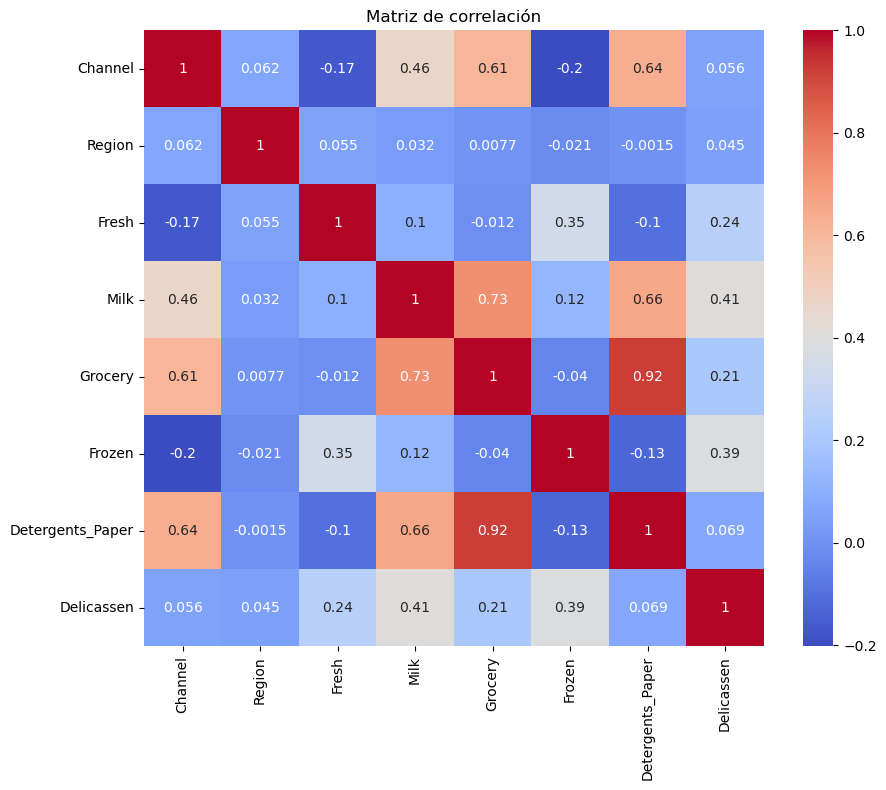

In [42]:
# Correlación
corr_matrix = customers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

**Tus observaciones aquí**

# Resumen de los datos

### Cantidad de datos
- **440 entradas** y **8 columnas**.

### Columnas
- **Channel** y **Region**: Variables categóricas codificadas como enteros.
- **Fresh**, **Milk**, **Grocery**, **Frozen**, **Detergents_Paper**, **Delicassen**: Cantidades numéricas que parecen ser valores de gasto en cada categoría.

---

## Observaciones generales

### Distribución de las columnas
- Hay diferencias en los rangos de los datos. Por ejemplo:
  - **Fresh** tiene valores desde **3** hasta **112,151**, con una **media** de **12,000** y una **desviación estándar** alta (**12,647**).
  - Otras categorías como **Frozen** tienen medias mucho más bajas (**3,071**) pero también valores máximos significativamente altos (**60,869**).
- Esto sugiere un fuerte **sesgo hacia valores extremos** en varias columnas.

---

### Correlación entre columnas
- A partir de la matriz de correlación proporcionada, podemos observar:
  - **Alta correlación** entre `Grocery` y `Detergents_Paper` (**0.92**).
  - **Alta correlación** entre `Milk` y `Grocery` (**0.73**).
- Estas correlaciones sugieren **posible redundancia** en los datos.

---

### Datos categóricos
- **Channel** y **Region** están en formato numérico, pero parecen ser variables categóricas.
  - Esto implica que podrían necesitarse conversiones a **variables dummy** si se aplican ciertos modelos.

---

### Datos extremos
- Las columnas tienen valores máximos significativamente más altos que sus percentiles **75**.
  - Esto podría indicar la presencia de **outliers**.




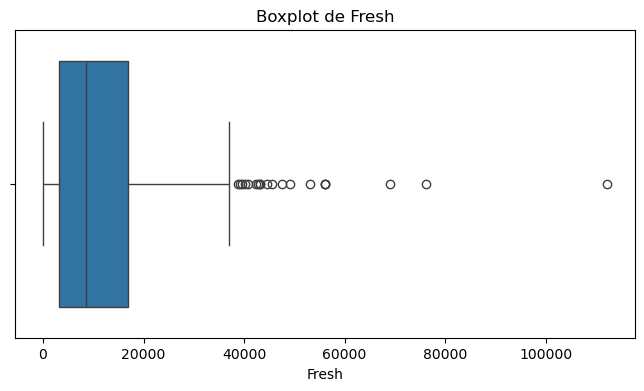

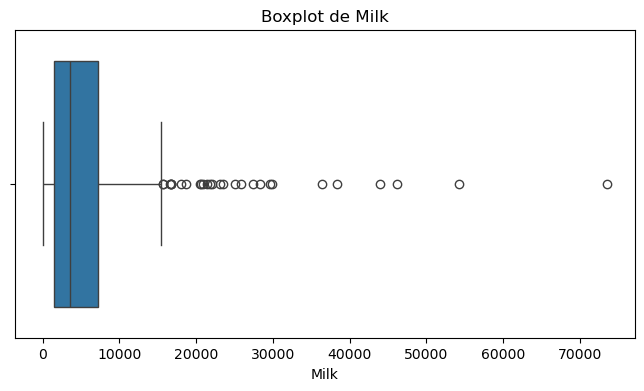

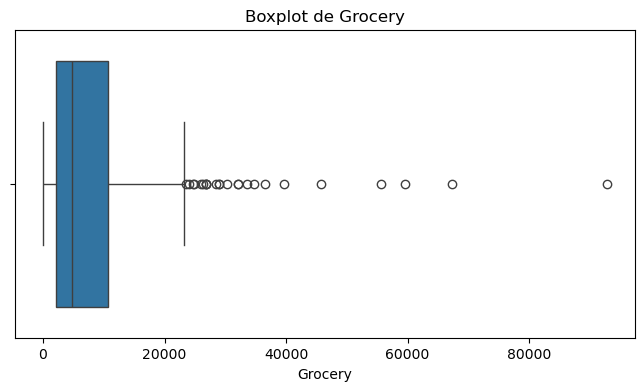

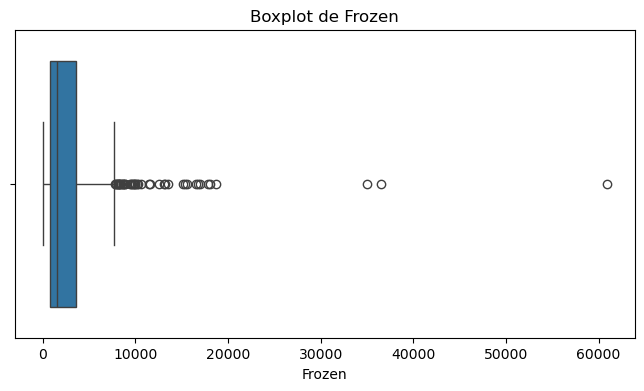

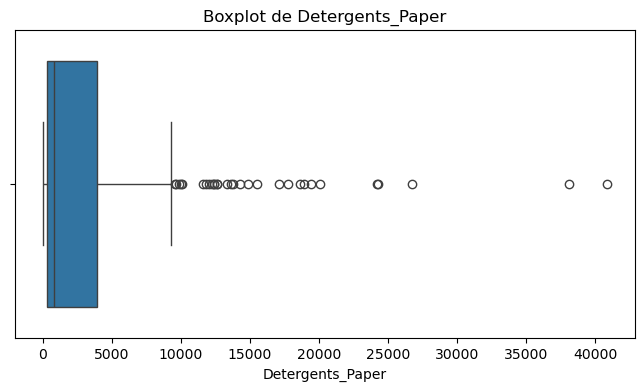

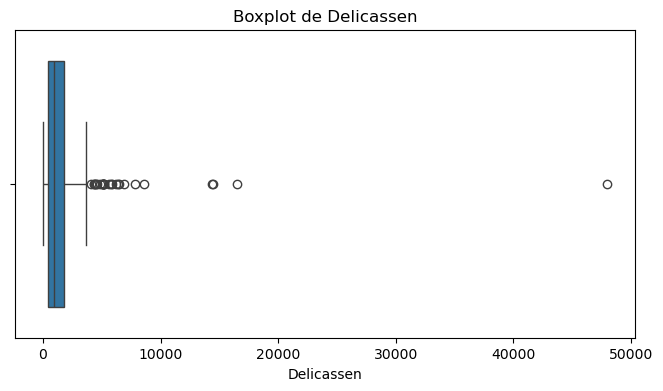

In [44]:
# Boxplots para identificar valores atípicos
columns_to_plot = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=customers[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [60]:
# Your code here
# Identificación de columnas numéricas
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Función para identificar y eliminar outliers
def remove_outliers(df, columns):
    clean_data = df.copy()
    for col in columns:
        Q1 = clean_data[col].quantile(0.25)
        Q3 = clean_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filtrar datos dentro de los límites
        clean_data = clean_data[(clean_data[col] >= lower_bound) & (clean_data[col] <= upper_bound)]
    return clean_data

# Eliminación de outliers
clean_customers = remove_outliers(customers, numerical_columns)

# Verificamos la cantidad de datos eliminados
print(f"Cantidad de datos inicial: {customers.shape[0]}")
print(f"Cantidad de datos después de eliminar outliers: {clean_customers.shape[0]}")


Cantidad de datos inicial: 440
Cantidad de datos después de eliminar outliers: 318


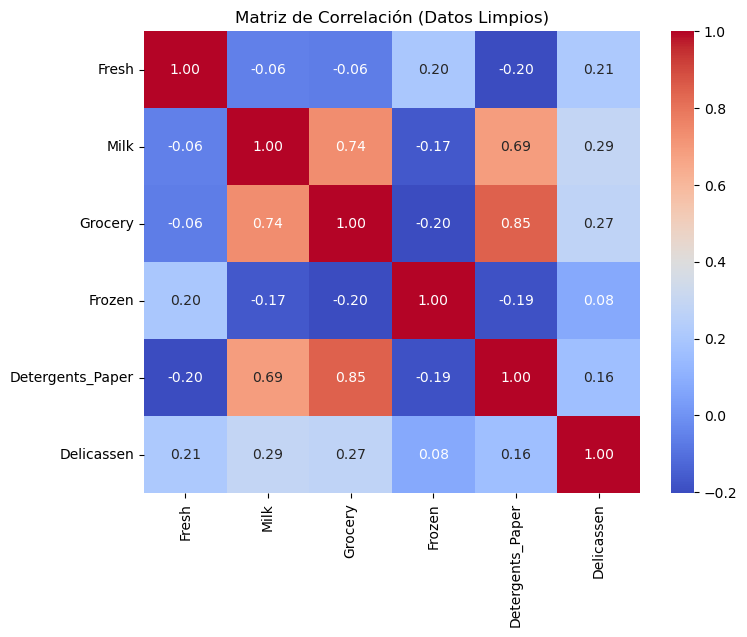

In [78]:
plt.figure(figsize=(8, 6))
sns.heatmap(clean_customers[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación (Datos Limpios)")
plt.show()


#### Eliminación de Outliers
1. **Identificación de columnas numéricas:**
   Las columnas numéricas consideradas para la limpieza son:
   - Fresh
   - Milk
   - Grocery
   - Frozen
   - Detergents_Paper
   - Delicassen

2. **Proceso de limpieza:**
   - Se utilizó el rango intercuartílico (IQR) para identificar valores extremos en cada columna.
   - Se eliminaron las filas donde los valores estaban fuera de los límites definidos por:
     - `Límite inferior = Q1 - 1.5 * IQR`
     - `Límite superior = Q3 + 1.5 * IQR`

3. **Resultados:**
   - **Cantidad inicial de datos:** 440
   - **Cantidad después de eliminar outliers:** 318
   - Se eliminó un total de 122 filas con valores extremos.


#### Matriz de correlación (datos limpios)
- Después de la limpieza, se generó una matriz de correlación para evaluar la relación entre las columnas numéricas.
- Observaciones clave:
  - La correlación entre **Grocery** y **Detergents_Paper** sigue siendo moderadamente alta (0.85).

---

### Decisión sobre Grocery y Detergents_Paper
1. **Correlación observada:** 
   - La correlación entre **Grocery** y **Detergents_Paper** es de 0.85. Aunque es alta, no supera el 0.9.

2. **Decisión:**
   - **Mantener ambas columnas.**
   - Justificación:
     - Aunque existe redundancia parcial, cada columna podría aportar información única que sea útil para análisis posteriores.
    


# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [83]:

# Escalamos las columnas numéricas
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_customers[numerical_columns])

# Convertimos en DataFrame
scaled_customers = pd.DataFrame(scaled_data, columns=numerical_columns)
scaled_customers.head()


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.360420,1.740710,0.432714,-0.984801,0.378277,0.451178
1,-0.325039,1.788015,0.867526,-0.023386,0.659241,1.009718
2,0.433216,-0.857996,-0.290889,2.859618,-0.605321,1.025020
3,-0.037274,1.311586,-0.094823,-0.704078,-0.020699,0.595276
4,0.294097,-0.242723,0.305758,-0.819597,0.589794,-0.560060


# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [104]:
# Inicializamos y ajustamos K-Means con 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42).fit(scaled_customers)

# Obtenemos las etiquetas de los clusters
labels = kmeans_2.predict(scaled_customers)
clusters = kmeans_2.labels_.tolist()

# Añadimos las etiquetas al DataFrame original
clean_customers['KMeans_Label'] = clusters

# Contamos la cantidad de datos en cada cluster
clean_customers['KMeans_Label'].value_counts()<

KMeans_Label
0    217
1    101
Name: count, dtype: int64


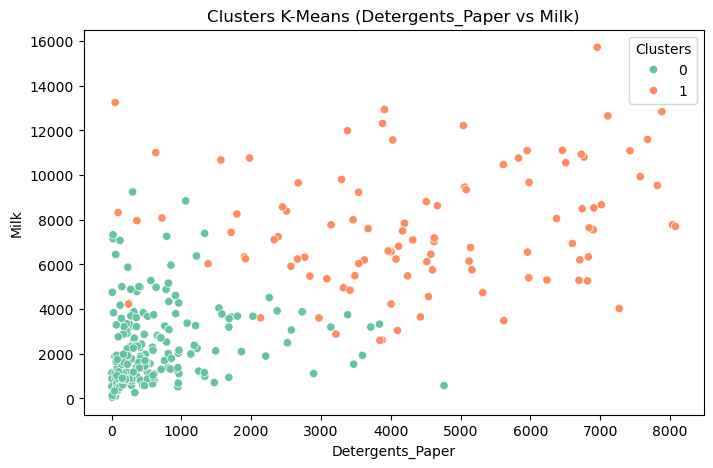

In [106]:
# Visualización de los clusters usando Detergents_Paper y Milk como ejemplo
plt.figure(figsize=(8, 5))
sns.scatterplot(data=clean_customers, x='Detergents_Paper', y='Milk', hue='KMeans_Label', palette='Set2')
plt.title('Clusters K-Means (Detergents_Paper vs Milk)')
plt.xlabel('Detergents_Paper')
plt.ylabel('Milk')
plt.legend(title='Clusters')
plt.show()

### Viendo el elbow pododríamos escoger 2 como el número de clusters correctos

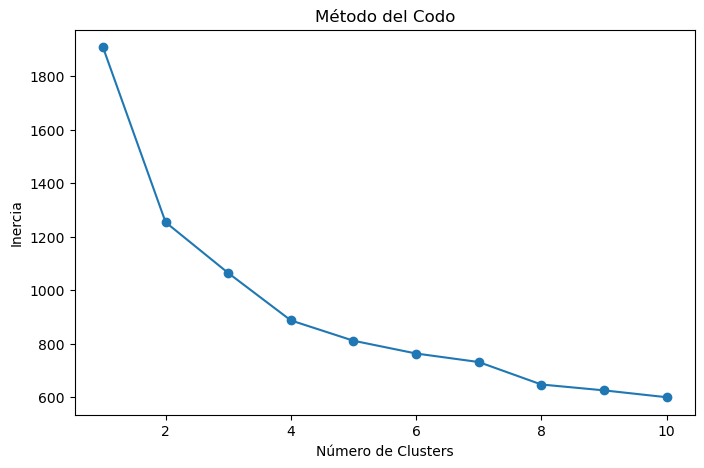

In [108]:
# Determinamos el número óptimo de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_customers)
    sse.append(kmeans.inertia_)

# Gráfico de codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()


Cuenta los valores en `labels`.

In [120]:
# Your code here:
print("Distribución de clusters en K-Means (n=2):")
clean_customers['KMeans_Label'].value_counts()

Distribución de clusters en K-Means (n=2):


KMeans_Label
0    217
1    101
Name: count, dtype: int64

# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [114]:
from sklearn.cluster import DBSCAN 

# Your code here

dbscan = DBSCAN(eps=0.5, min_samples=5).fit(scaled_customers)
dbscan_labels = dbscan.labels_
clean_customers['DBSCAN_Label'] = dbscan_labels

Cuenta los valores en `labels_DBSCAN`.

In [118]:
# Your code here
clean_customers['DBSCAN_Label'].value_counts()

DBSCAN_Label
-1    282
 0     23
 1     13
Name: count, dtype: int64

# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

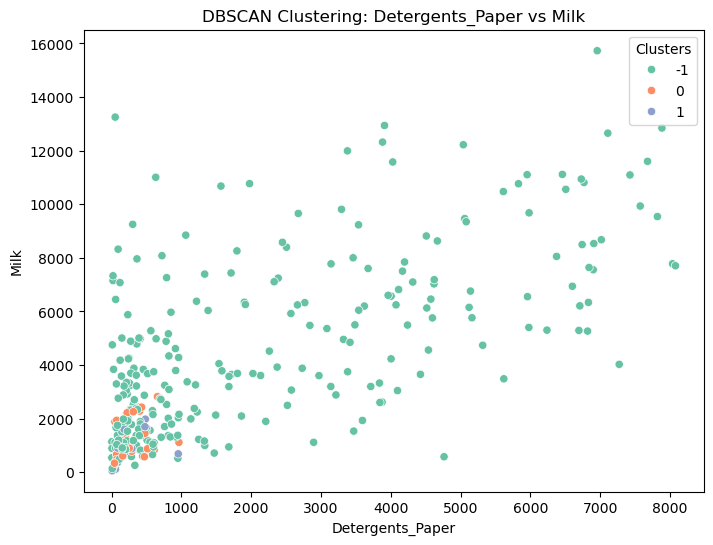

In [138]:
def plot_clusters(data, x, y, hue, title):
    """
    Función para generar un gráfico de dispersión con clusters.
    
    Parameters:
        data (DataFrame): Dataset con las columnas de interés.
        x (str): Nombre de la columna para el eje X.
        y (str): Nombre de la columna para el eje Y.
        hue (str): Nombre de la columna que representa los clusters.
        title (str): Título del gráfico.
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=x, y=y, hue=hue, palette="Set2")
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(title="Clusters")
    plt.show()

plot_clusters(
    data=clean_customers,
    x="Detergents_Paper",
    y="Milk",
    hue="DBSCAN_Label",
    title="DBSCAN Clustering: Detergents_Paper vs Milk"
)

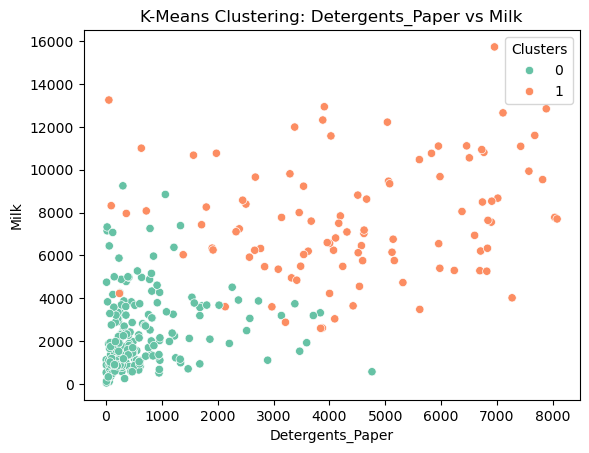

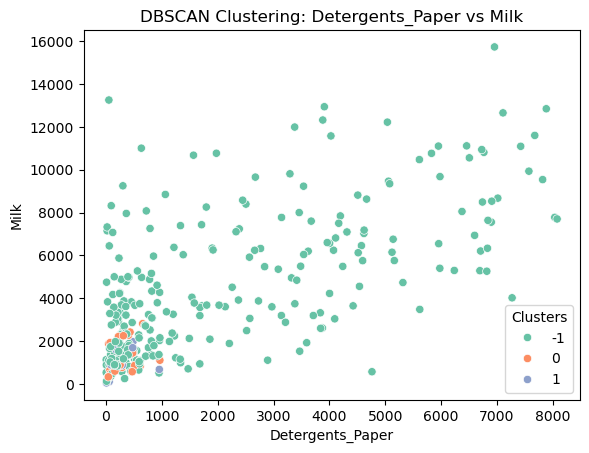

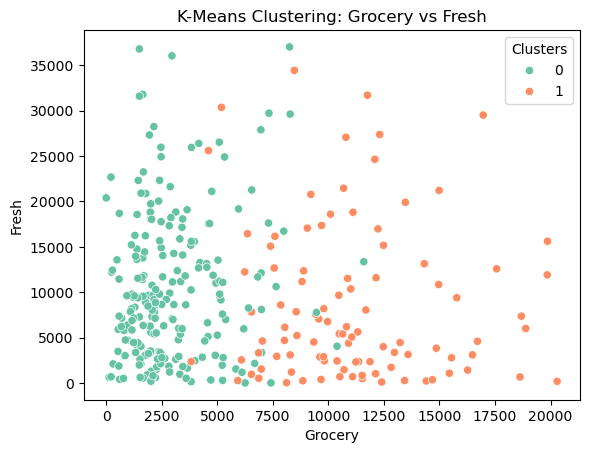

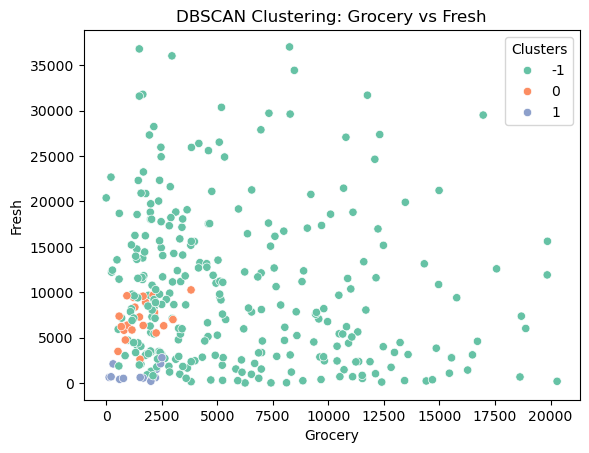

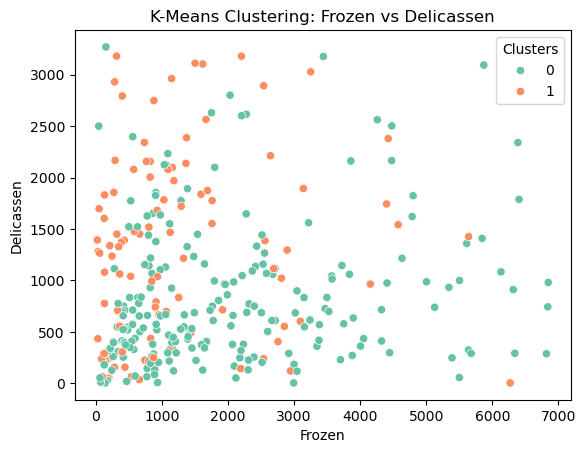

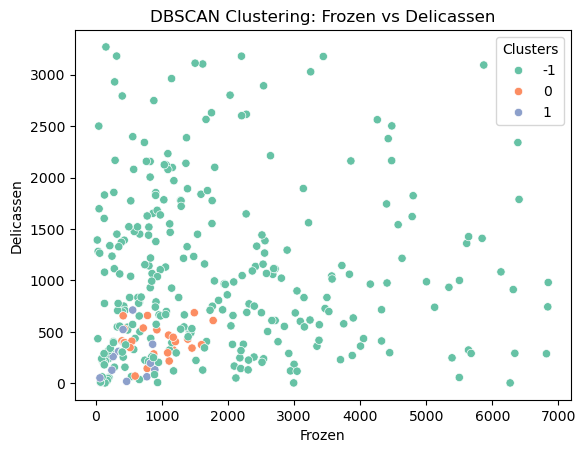

In [132]:
# Definimos las combinaciones de variables a comparar
variable_pairs = [
    ("Detergents_Paper", "Milk"),
    ("Grocery", "Fresh"),
    ("Frozen", "Delicassen")
]

# Función para generar los gráficos
def plot_all_clusters(data, variable_pairs):
    algorithms = ["KMeans_Label", "DBSCAN_Label"]
    titles = {
        "KMeans_Label": "K-Means Clustering",
        "DBSCAN_Label": "DBSCAN Clustering"
    }

    for x, y in variable_pairs:
        for algorithm in algorithms:
            sns.scatterplot(
                data=data,
                x=x,
                y=y,
                hue=algorithm,
                palette="Set2"
            )
            plt.title(f"{titles[algorithm]}: {x} vs {y}")
            plt.xlabel(x)
            plt.ylabel(y)
            plt.legend(title="Clusters")
            plt.show()

# Ejecutamos la función para generar todos los gráficos
plot_all_clusters(clean_customers, variable_pairs)


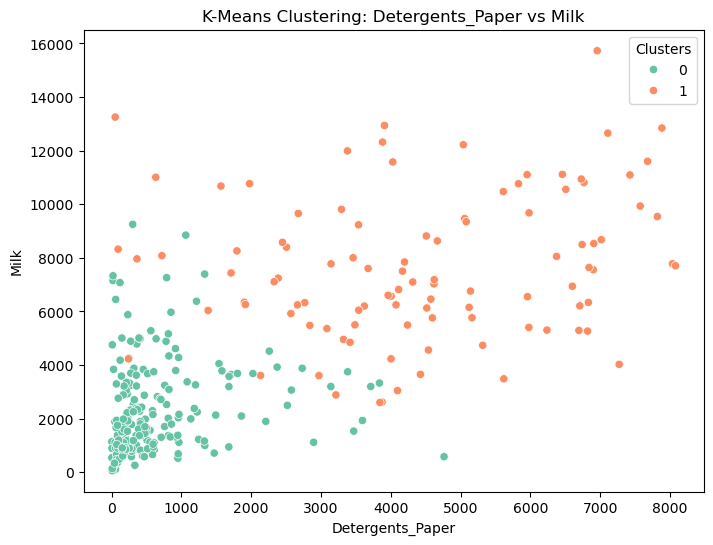

In [140]:
# Your code here:
plot_clusters(
    data=clean_customers,
    x="Detergents_Paper",
    y="Milk",
    hue="KMeans_Label",  # Cambiar a DBSCAN_Label para DBSCAN
    title="K-Means Clustering: Detergents_Paper vs Milk"
)

Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

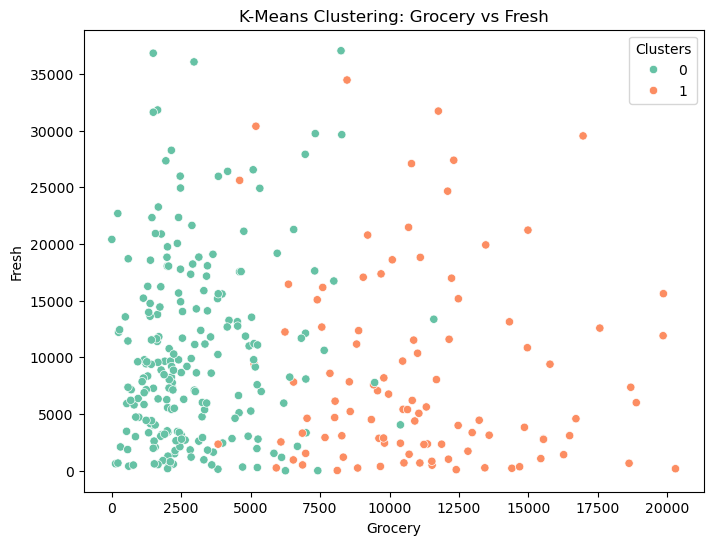

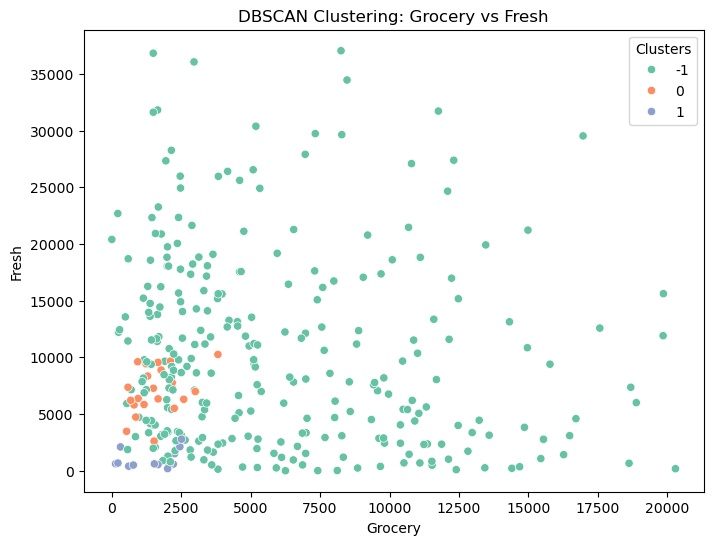

In [146]:
# Your code here:
plot_clusters(
    data=clean_customers,
    x="Grocery",
    y="Fresh",
    hue="KMeans_Label",
    title="K-Means Clustering: Grocery vs Fresh"
)

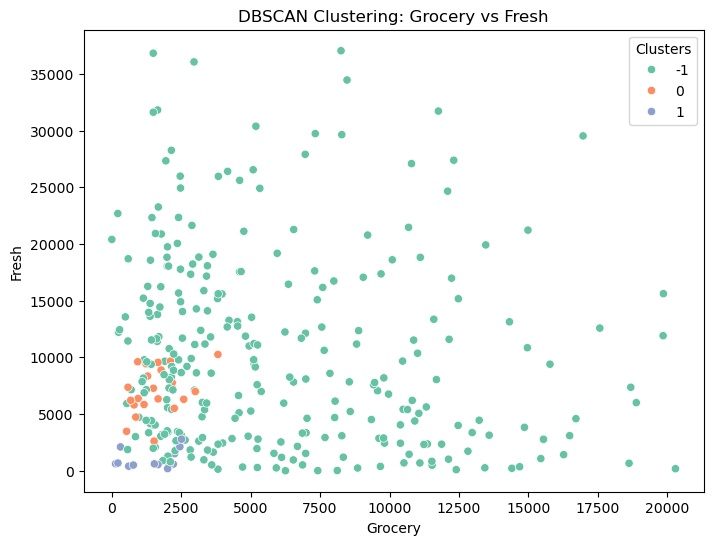

In [148]:
plot_clusters(
    data=clean_customers,
    x="Grocery",
    y="Fresh",
    hue="DBSCAN_Label",
    title="DBSCAN Clustering: Grocery vs Fresh"
)

Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

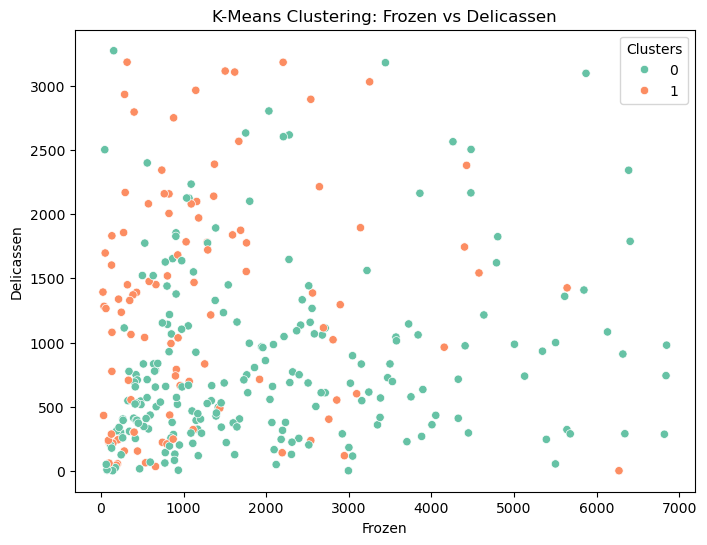

In [150]:
# Your code here:
plot_clusters(
    data=clean_customers,
    x="Frozen",
    y="Delicassen",
    hue="KMeans_Label",
    title="K-Means Clustering: Frozen vs Delicassen"
)

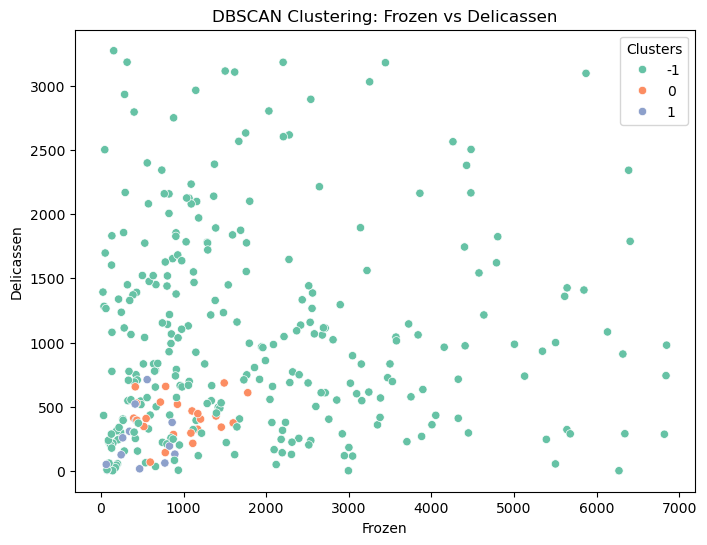

In [152]:
plot_clusters(
    data=clean_customers,
    x="Frozen",
    y="Delicassen",
    hue="DBSCAN_Label",
    title="DBSCAN Clustering: Frozen vs Delicassen"
)

Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [160]:
# Your code here:
kmeans_grouped = clean_customers.groupby('KMeans_Label').mean()
print("Media de las variables agrupadas por K-Means:")
kmeans_grouped

Media de las variables agrupadas por K-Means:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Labels,DBSCAN_Label
KMeans_Label,,,,,,,,,,
0,1.046083,2.502304,10310.345622,2273.410138,2980.276498,2049.686636,631.285714,835.041475,0.0,-0.774194
1,1.752475,2.683168,8445.861386,7675.524752,11114.168317,1262.455446,4438.841584,1304.643564,1.0,-1.000000


In [162]:
dbscan_grouped = clean_customers.groupby('DBSCAN_Label').mean()
print("\nMedia de las variables agrupadas por DBSCAN:")
dbscan_grouped



Media de las variables agrupadas por DBSCAN:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMeans_Labels,KMeans_Label
DBSCAN_Label,,,,,,,,,,
-1,1.304965,2.556738,10335.216312,4348.946809,6071.492908,1929.301418,2039.893617,1064.670213,0.358156,0.358156
0,1.000000,2.521739,7076.521739,1302.652174,1666.000000,956.652174,305.826087,415.826087,0.000000,0.000000
1,1.000000,2.692308,1006.615385,938.000000,1444.000000,478.769231,232.923077,244.000000,0.000000,0.000000


¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

El rendimiento de los algoritmos...

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [ ]:
# Your code here


**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
